In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
X_moons_train, y_moons_train = make_moons(n_samples=150, noise=0.2, random_state=42)
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [13]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [14]:
tree_clf1.fit(X_moons_train, y_moons_train)

DecisionTreeClassifier(random_state=42)

In [15]:
tree_clf2.fit(X_moons_train, y_moons_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [33]:
def plot_decision_boundary(X, y, clf, title):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict class label for each grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot the original data points
    markers = ['o', '^']
    colors = ['cyan', 'black']
    labels = np.unique(y).tolist()
    for i, label in enumerate(labels):
        X_sub = X[y == label]
        plt.scatter(X_sub[:,0], X_sub[:,1], marker=markers[i], color=colors[i])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)

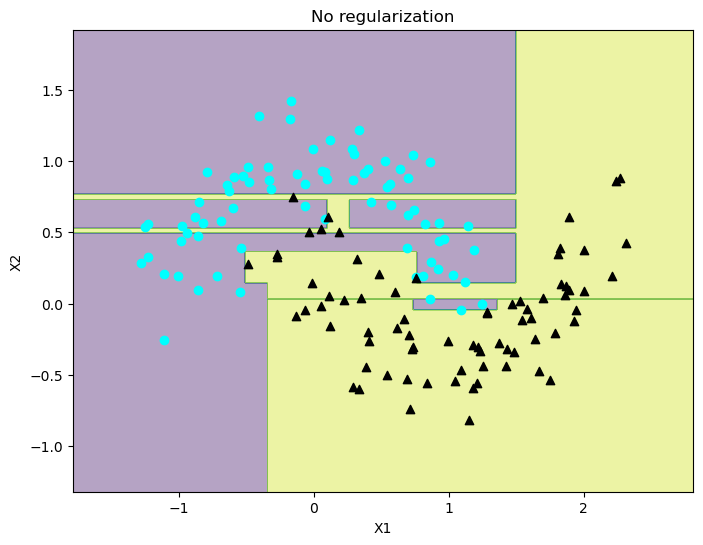

In [34]:
plot_decision_boundary(X_moons_train, y_moons_train, tree_clf1, title='No regularization')

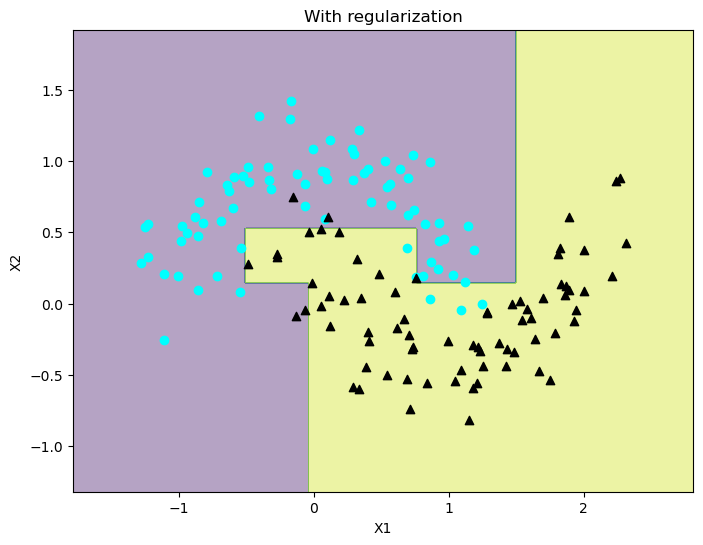

In [35]:
plot_decision_boundary(X_moons_train, y_moons_train, tree_clf2, title='With regularization')

- As can be seen, when decision tree is left unregularized, it will most likely overfit, as happened in this case as well.
- On the other hand, when adding regularization, it clearly leads to less complex decision boundaries.
- Models with less complex decision boundaries are more likely to generalize better to new, unseen data. This happens by reducing variance with the cost of adding some bias.
- In general, regularization decreases variance (reduces sensitivity to noise in the data) at the cost of adding some bias (i.e., the model loses some flexibility with the constraints added by the regularization). This is called the bias-variance trade-off. In most cases, reducing variance and adding some bias will improve the model's generalization to new, unseen data.

**Variance** of the model means how much the model's predictions fluctuate when trained on different datasets collected from the same underlying distribution (i.e., different random samples from the same population).

This basically means that if we were to collect multiple independent datasets from some distribution, train the model **separately** on each dataset, a **high-variance** model would produce significantly different predictions with the different datasets, while a **low-variance** model would produce more consistent results across the different datasets.

In [36]:
# Evaluate the two classifiers on the test set
y_pred_clf1 = tree_clf1.predict(X_moons_test)
y_pred_clf2 = tree_clf2.predict(X_moons_test)

In [40]:
# Unregularized model
accuracy_score(y_true=y_moons_test, y_pred=y_pred_clf1)

0.898

In [42]:
# Regularized model
accuracy_score(y_true=y_moons_test, y_pred=y_pred_clf2)

0.92

- As can be seen, by adding regularization and therefore decreasing the *variance* of the model (with the expense of adding some *bias*) produces a model with a better generalization capability.